# NEURAL NETWORK FROM SCRATCH

# 1. Loading the data

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

images = np.loadtxt('features.txt',delimiter=',')


In [2]:
images=images.reshape(5000,400)

In [3]:
labels=np.loadtxt('labels.txt',delimiter=',')
labels=np.where(labels==10, 0, labels)

from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)

labels = one_hot_encoder.fit_transform(np.array(labels).reshape(-1, 1))
labels[:5]
labels.shape

C:\Users\AyYa\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


(5000, 10)

# 2. Visualizating data 

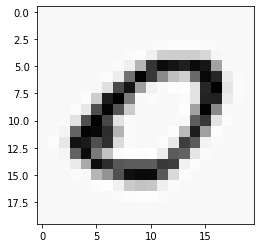

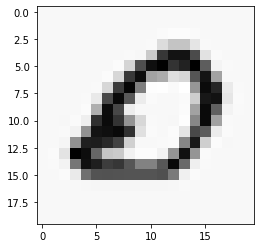

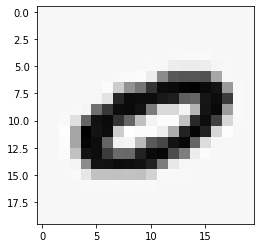

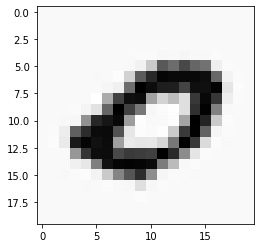

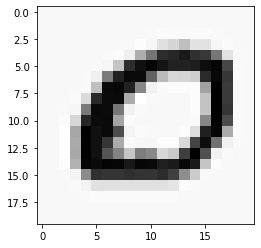

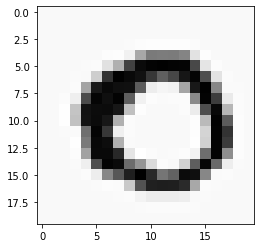

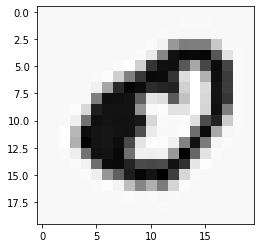

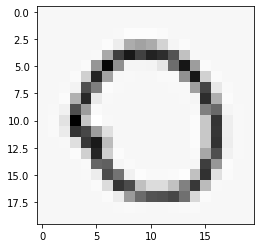

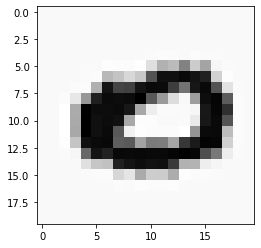

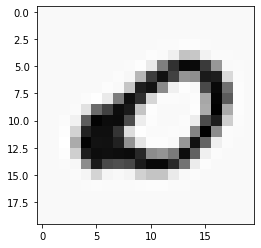

In [4]:
for i in range(10):
    img = images[i].reshape((20,20))
    plt.imshow(img, cmap="Greys")
    plt.show()

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size=0.15)

# 3. The Neural Network

In [6]:
def my_neural_network(X_train, Y_train, iterations=10, layers=[], learning_rate=0.15):
    #hidden_layers = len(layers) - 1
    weights = initialization(layers)

    for iteration in range(1, iterations+1):
        weights = fit(X_train, Y_train, learning_rate, weights)

        print("Iteration : ",iteration," accuracy: ",score(X_train, Y_train, weights))

    return weights

In [23]:
def initialization(layers):
    nb_layers= len(layers)
    weights = []
    
    for i in range(1, nb_layers):
        w = [[np.random.uniform(-1, 1) for k in range(layers[i-1] + 1)] for j in range(layers[i])]
        weights.append(np.matrix(w))
    
    return weights

def initialization(layers):
    nb_layers= len(layers)
    weights = []
    
    #we dont take the first layer(input layer)
    for i in range(1, nb_layers):
        w=[[]]
        for j in range(layers[i]):
            for k in range(layers[i-1] + 1):
                w.append(np.random.rand())
        weights.append(np.matrix(w))
    
    return weights

In [8]:
def forward_propagation(x, weights, nb_layers):
    outputs=[x]
    layer_input = x
    for j in range(nb_layers):
        output = sigmoid(np.dot(layer_input, weights[j].T))
        outputs.append(output)
        layer_input = np.append(1, output) # add bias
    
    return outputs

In [9]:
def back_propagation(y, outputs, weights, layers):
    outputFinal = outputs[-1]
    cost = np.matrix(y - outputFinal) # the cost for each final output
    
    #we loop from last layer to first 
    for j in range(layers, 0, -1):
        curroutput = outputs[j]
        
        if(j > 1):
            # we add the biais on all layers except the first
            prevoutput = np.append(1, outputs[j-1])
        else:
            prevoutput = outputs[0]
        
        #computing deltas 
        delta = np.multiply(cost, sigmoid_derivative(curroutput))
        #ajusting weights 
        weights[j-1] += learning_rate * np.multiply(delta.T, prevoutput)

        w = np.delete(weights[j-1], [0], axis=1) # Remove bias from weights
        cost = np.dot(delta, w) # compute the cost
    
    return weights

In [10]:
def fit(X, Y, learning_rate, weights):
    nb_layers = len(weights)
    for i in range(len(X)):
        x, y = X[i], Y[i]
        x = np.matrix(np.append(1, x)) # add biais
        
        outputs = forward_propagation(x, weights, nb_layers)
        weights = back_propagation(y, outputs, weights, nb_layers)

    return weights

In [11]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return np.multiply(z, 1-z)

In [12]:
def score(X, Y, weights):
    #the score is the correct answers over all the answers(accuracy)
    correct = 0

    for i in range(len(X)):
        x, y = X[i], list(Y[i])
        y_pred = predict(x, weights)

        if(y == y_pred):
            # well guessed
            correct += 1
            
    return correct / len(X)

In [13]:
def predict(item, weights):
    layers = len(weights)
    item = np.append(1, item) #biais
    
    ##_Forward Propagation_##
    outputs = forward_propagation(item, weights, layers)
    
    lastoutput = outputs[-1].A1
    pred = best_output(lastoutput)

    # Initialize prediction vector to zeros
    y = [0]*len(lastoutput)
    y[pred] = 1  # the best output is the label guessed

    return y # Return the best label (the vector)

#finding the best output in the last output vector
def best_output(output):
    best, best_index = output[0], 0
    for i in range(1, len(output)):
        if(output[i] > best):
            best, best_index = output[i], i
    
    return best_index

# 4. The TEST

In [24]:
layers = [400, 10,5,10] # Number of neurons in each layers
learning_rate, iterations = 0.15, 5

weights = my_neural_network(X_train, Y_train, iterations=iterations, layers=layers, learning_rate=learning_rate);

Iteration :  1  accuracy:  0.31388235294117645
Iteration :  2  accuracy:  0.5004705882352941
Iteration :  3  accuracy:  0.5705882352941176
Iteration :  4  accuracy:  0.6687058823529411
Iteration :  5  accuracy:  0.7388235294117647


In [ ]:
print("Testing Accuracy: ",score(X_test, Y_test, weights))

In [25]:
weights

[matrix([[ 0.41087959,  0.52392714,  0.84482759, ..., -0.46532059,
          -0.10142419,  0.91177266],
         [ 0.32333251,  0.73669172,  0.1065935 , ...,  0.2273076 ,
           0.86228278,  0.08570801],
         [-0.04475627,  0.89640184, -0.75468638, ...,  0.82003346,
           0.26373167,  0.39651684],
         ...,
         [ 0.7557192 ,  0.52606206, -0.35674166, ..., -0.42173736,
          -0.79183487, -0.90755597],
         [ 0.39587306,  0.07450004, -0.79761426, ...,  0.98338568,
          -0.17408343, -0.2789039 ],
         [-0.69680328,  0.71792073,  0.41018616, ..., -0.82091422,
           0.65681953, -0.63518542]]),
 matrix([[-0.14806493, -0.3299953 ,  2.06690566,  2.50055272, -1.98087868,
           0.62937996, -1.15709793, -0.89319308,  2.68912693, -1.08307804,
           0.20733841],
         [-0.87090345,  1.25111801,  0.49504645, -3.27355238,  0.88014963,
           0.31746388, -2.64723249,  0.5213756 ,  0.8373346 ,  3.06221244,
           0.7263063 ],
         [ 0